# Lista 5

In [5]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd, random, seaborn as sns, math
from scipy.stats import norm, lognorm

## zadanie 3

In [7]:
alfa = 1
beta = 2

In [11]:
def alpha_hat(X):
    n = len(X)
    return np.mean(X)**2/(1/n * sum(xi**2 for xi in X) - np.mean(X)**2)

In [12]:
def beta_hat(X):
    n = len(X)
    return np.mean(X)/(1/n * sum(xi**2 for xi in X) - np.mean(X)**2)

In [13]:
ns = np.linspace(1000, 10000, 10)

In [27]:
As = {}
Bs = {}
for n in ns:
    n = int(n)
    As[n] = []
    Bs[n] = []
    for i in range(0,1000):
        X = np.random.gamma(1,2, size = n)
        al = alpha_hat(X)
        bet = beta_hat(X)
        As[n].append(al)
        Bs[n].append(bet)


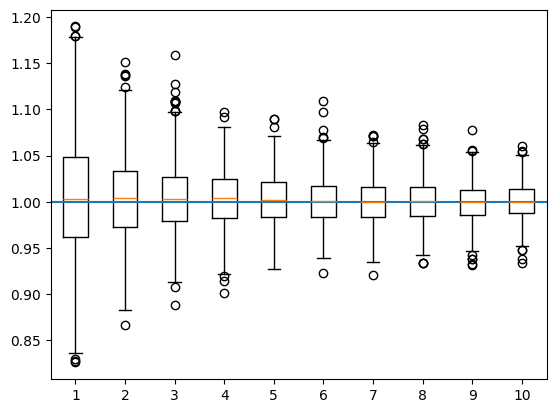

In [34]:
plt.boxplot(As.values())
plt.axhline(y = 1)

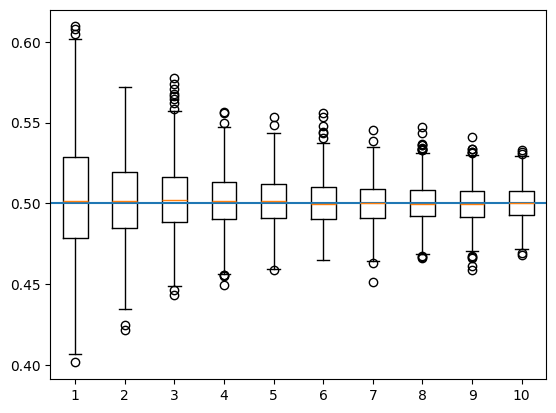

In [37]:
plt.boxplot(Bs.values())
plt.axhline(y = 0.5)

## zadanie 4
Dla rozkładu podanego w zadaniu 7 (lista 4) wyznacz estymator parametru θ wykorzystując
metodę momentów. Wykorzystując symulacje Monte Carlo sprawdź poprawność estymatora.
Wyniki dla metody momentów porównaj z tymi uzyskanymi dla metody największej wiarogodności.

$X$ ma rozkład wykładniczy z parametrem $\lambda = 1$, wówczas $Y = X + \theta$
$$f(x) = e^{-(x - \theta)}, x>0$$

In [1]:
def theta_hat2(Y):
    return np.mean(Y) - 1

In [7]:
def theta_hat(X):
    return min(X)

In [8]:
theta = 2
n = 1000
hats1 = []
hats2 = []
for i in range(n):
    X = np.random.exponential(1, n)
    Y = X + theta
    thetahat = theta_hat(Y)
    t2 = theta_hat2(Y)
    hats1.append(thetahat)
    hats2.append(t2)

{'whiskers': [<matplotlib.lines.Line2D at 0x255e3008710>,
 'caps': [<matplotlib.lines.Line2D at 0x255e3009c90>,
 'boxes': [<matplotlib.lines.Line2D at 0x255e2dffb90>,
 'medians': [<matplotlib.lines.Line2D at 0x255e300b1d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x255e300bd90>,
 'means': []}

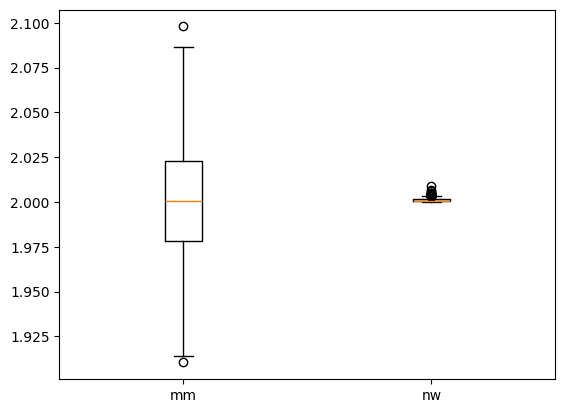

In [13]:
plt.boxplot([hats2, hats1], labels = ['mm', 'nw'])

## zadanie 5
Dla rozkładu podanego w zadaniu 9 (lista 4) wyznacz estymator parametru a wykorzystując
metodę momentów. Wykorzystując symulacje Monte Carlo sprawdź poprawność estymatora.
Wyniki dla metody momentów porównaj z tymi uzyskanymi dla metody największej wiarogodności

$$f(x) = (a+1)x^a, 0<x<1$$

In [17]:
a = 2

In [11]:
def a_hat(X):
    return 1/(1- np.mean(X)) - 2 

In [22]:
def a_hat0(X):
    return -1 - (len(X)/sum(np.log(x) for x in X))

In [18]:
def asym(n = 1000):
    u = np.random.rand(n)
    return np.power(u, 1/(a+1))

In [23]:
a1 = []
a2 = []
for i in range(n):
    X = asym()
    aa1 = a_hat0(X)
    aa2 = a_hat(X)
    a1.append(aa1)
    a2.append(aa2)

{'whiskers': [<matplotlib.lines.Line2D at 0x255e31a2710>,
 'caps': [<matplotlib.lines.Line2D at 0x255e31a3fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x255e31a1a50>,
 'medians': [<matplotlib.lines.Line2D at 0x255e31ad510>,
 'fliers': [<matplotlib.lines.Line2D at 0x255e31addd0>,
 'means': []}

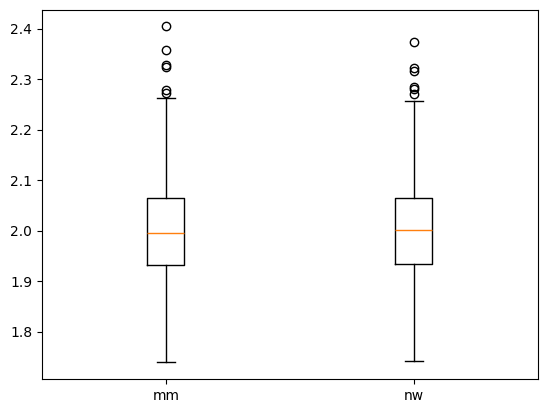

In [24]:
plt.boxplot([a2, a1], labels = ['mm', 'nw'])